In [30]:
# Import Numpy, keras and MNIST data
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

# Retrieve the training and test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape: ', y_test.shape)


X_train shape: (60000, 28, 28)
X_test shape:  (10000, 28, 28)
y_train shape: (60000,)
y_test shape:  (10000,)


In [2]:
from keras.utils.np_utils import to_categorical
a=to_categorical(3,10)
a,a.shape

(array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32), (10,))

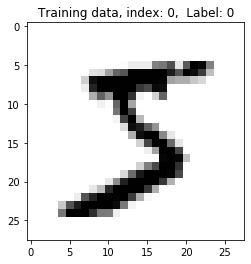

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)
(60000,)
(60000, 10)


In [31]:
from keras import layers
# Visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline

#函数，用于根据MNIST集合中的索引显示训练图像
def display_digit(index):
    label = y_train[index].argmax(axis=0)
    image = X_train[index]
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
image=X_train[0]
    
#显示第一个(索引0)训练图像
display_digit(0)

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

#One Hot encoding of labels.
from keras.utils.np_utils import to_categorical
print(y_train.shape)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)




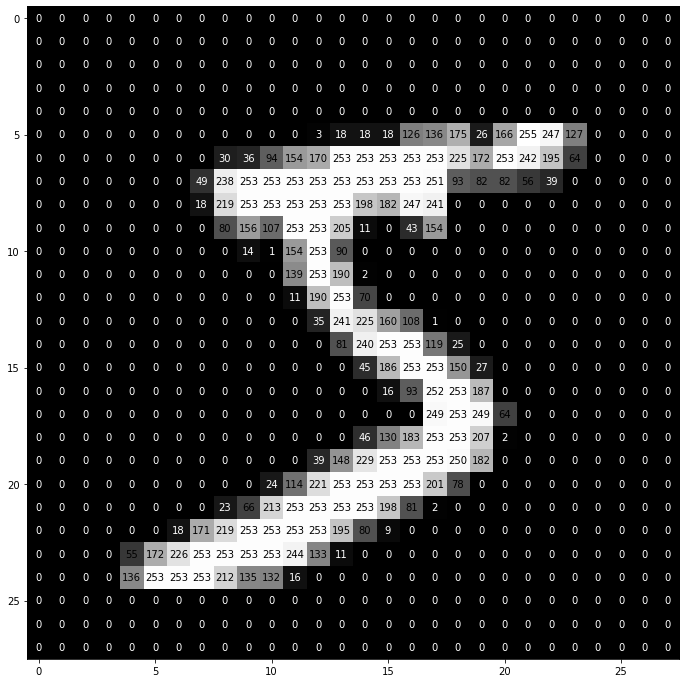

In [32]:

def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max() / 5
    for x in range(width):
        for y in range(height):
            ax.annotate(round(img[ x ][ y ], 2), xy=(y, x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[ x ][ y ] < thresh else 'black')


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
visualize_input(image, ax)

In [14]:
# Define the neural network
def build_model():
    model = Sequential()
    model.add(Dense(512, input_shape=(784,)))
    model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
    model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.
    return model

In [15]:

# Build the model
model = build_model()

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

# Training
model.fit(X_train, y_train, batch_size=128, nb_epoch=4, verbose=1,validation_data=(X_test, y_test))

# Compare the labels that our model predicts with the actual labels

score = model.evaluate(X_test, y_test, batch_size=32, verbose=1,sample_weight=None)
# Print out the result
print('Test score:', score[0])
print('Test accuracy:', score[1])



E:\AS\anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 2s 31us/step - loss: 0.2450 - accuracy: 0.9245 - val_loss: 0.1024 - val_accuracy: 0.9685
Epoch 2/4
60000/60000 [==============================] - 2s 29us/step - loss: 0.1024 - accuracy: 0.9686 - val_loss: 0.0854 - val_accuracy: 0.9742
Epoch 3/4
60000/60000 [==============================] - 2s 29us/step - loss: 0.0763 - accuracy: 0.9766 - val_loss: 0.0959 - val_accuracy: 0.9722
Epoch 4/4
10000/10000 [==============================] - 0s 45us/step
Test score: 0.07198249264023616
Test accuracy: 0.9800999760627747


In [22]:
from keras import models

def build_model1():
        model = models.Sequential()
        model.add(layers.Conv2D(512,(3,3), activation='relu',input_shape=(784,1))) 
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(512,(3,3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(512,(3,3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(512,(3,3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        #将输入展平。不影响批量大小。如（150，150，3）展开后（150*150*3）
        model.add(layers.Flatten())
        model.add(layers.Dense(512, activation='relu'))
        model.add(layers.Dense(10, activation='sigmoid'))
        return model


In [23]:
# Build the model
model = build_model1()

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

# Training
model.fit(X_train, y_train, batch_size=128, nb_epoch=4, verbose=1,validation_data=(X_test, y_test))

# 比较我们的模型预测的标签和实际的标签

score = model.evaluate(X_test, y_test, batch_size=32, verbose=1,sample_weight=None)
# Print out the result
print('Test score:', score[0])
print('Test accuracy:', score[1])



ValueError: Input 0 is incompatible with layer conv2d_3: expected ndim=4, found ndim=3